In [1]:
import pandas as pd
import numpy as np

In [2]:
# Step 1: Load CSVs
dietary = pd.read_csv("C:/GA/Lab/Lab 10 Capstone/Data source/Dietary_Intake_2021-2023.csv")
glucose = pd.read_csv("C:/GA/Lab/Lab 10 Capstone/Data source/Plasma_Glucose_2021-2023.csv")
ferritin = pd.read_csv("C:/GA/Lab/Lab 10 Capstone/Data source/Ferritin_2021-2023.csv")
vitamin_d = pd.read_csv("C:/GA/Lab/Lab 10 Capstone/Data source/Vitamin_D_2021-2023.csv")

In [3]:
# Step 2: Select fields
dietary_sel = dietary[["SEQN", "DR1TPROT", "DR1TFIBE", "DR1TMOIS"]]
glucose_sel = glucose[["SEQN", "LBXGLU"]]
ferritin_sel = ferritin[["SEQN", "LBXFER"]]
vitamin_d_sel = vitamin_d[["SEQN", "LBXVIDMS"]]

In [4]:
# Step 3: Merge datasets
merged = dietary_sel.merge(glucose_sel, on="SEQN", how="inner")
merged = merged.merge(ferritin_sel, on="SEQN", how="inner")
merged = merged.merge(vitamin_d_sel, on="SEQN", how="inner")

In [5]:
# Step 4: Drop missing values
cleaned_data = merged.dropna()

In [6]:
cleaned_data.to_csv("C:/GA/Lab/Lab 10 Capstone/Data source/Updated/Cleaned_and_Merged_Dataset.csv", index=False)

In [7]:
# Step 6: calculate halth score
def calculate_health_score(row):
    score = 100
    # Fiber
    if row["DR1TFIBE"] < 15:
        score -= 15
    elif row["DR1TFIBE"] < 25:
        score -= 5
    # Protein
    if row["DR1TPROT"] < 30:
        score -= 15
    elif row["DR1TPROT"] < 45:
        score -= 5
    # Water
    if row["DR1TMOIS"] < 1000:
        score -= 15
    elif row["DR1TMOIS"] < 1500:
        score -= 5
    # Glucose
    if row["LBXGLU"] >= 126:
        score -= 15
    elif row["LBXGLU"] >= 100:
        score -= 7
    # Ferritin
    if row["LBXFER"] < 10:
        score -= 10
    elif row["LBXFER"] < 20:
        score -= 5
    # Vitamin D
    if row["LBXVIDMS"] < 30:
        score -= 10
    elif row["LBXVIDMS"] < 50:
        score -= 5
    return max(score, 0)

In [9]:
df = cleaned_data.copy()
df["Health_Score"] = df.apply(calculate_health_score, axis=1)


In [17]:
# Step 7: Randomly sample 90 rows to simulate 90 days
simulated_90_days = cleaned_data.sample(n=90, random_state=42).reset_index(drop=True)
simulated_90_days["Day"] = np.arange(1, 91)

In [19]:
# Step 8: Apply Health_Score
simulated_90_days["Health_Score"] = simulated_90_days.apply(calculate_health_score, axis=1)

In [21]:
# Step 9: Reorder columns
cols = ["Day"] + [col for col in simulated_90_days.columns if col != "Day"]
simulated_90_days = simulated_90_days[cols]

In [23]:
# Step 10: Export
simulated_90_days.to_csv("C:/GA/Lab/Lab 10 Capstone/Data source/Updated/Simulated_90-Day_Health_Data.csv", index=False)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Load your data
df = pd.read_csv("C:/GA/Lab/Lab 10 Capstone/Data source/Updated/Simulated_90-Day_Health_Data.csv")  

In [27]:
# Features and target
X = df[["DR1TPROT", "DR1TFIBE", "DR1TMOIS", "LBXGLU", "LBXFER", "LBXVIDMS"]]
y = df["Health_Score"]

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R²: 0.6123536780850162
RMSE: 6.526716141912571


C:\Users\qiany\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
# Create a DataFrame to display each feature's influence on the health score
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coef_df.sort_values(by="Coefficient", ascending=False))

    Feature  Coefficient
1  DR1TFIBE     0.738604
5  LBXVIDMS     0.141038
4    LBXFER     0.031184
0  DR1TPROT     0.025046
2  DR1TMOIS     0.000403
3    LBXGLU    -0.163814


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
# Step 1: Load the simulated health dataset
df = pd.read_csv("C:/GA/Lab/Lab 10 Capstone/Data source/Updated/Simulated_90-Day_Health_Data.csv")

In [43]:
# Step 2: Create Health_Label based on Health_Score
def assign_label(score):
    if score >= 85:
        return "Good"
    elif score >= 60:
        return "Moderate"
    else:
        return "Poor"

df["Health_Label"] = df["Health_Score"].apply(assign_label)

In [45]:
# Step 3: Binarize the target for binary classification (e.g., Good vs. Not Good)
df["Health_Binary"] = df["Health_Label"].apply(lambda x: 1 if x == "Good" else 0)

In [47]:
# Step 4: Prepare X and y
X = df[["DR1TPROT", "DR1TFIBE", "DR1TMOIS", "LBXGLU", "LBXFER", "LBXVIDMS"]]
y = df["Health_Binary"]

In [49]:
# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Step 6: Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\qiany\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
# Step 7: Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5 3]
 [1 9]]
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.75      0.90      0.82        10

    accuracy                           0.78        18
   macro avg       0.79      0.76      0.77        18
weighted avg       0.79      0.78      0.77        18



In [55]:
# Optional: Export final CSV with labels to Tableau
df.to_csv("C:/GA/Lab/Lab 10 Capstone/Data source/Updated/Final_for_Tableau.csv", index=False)

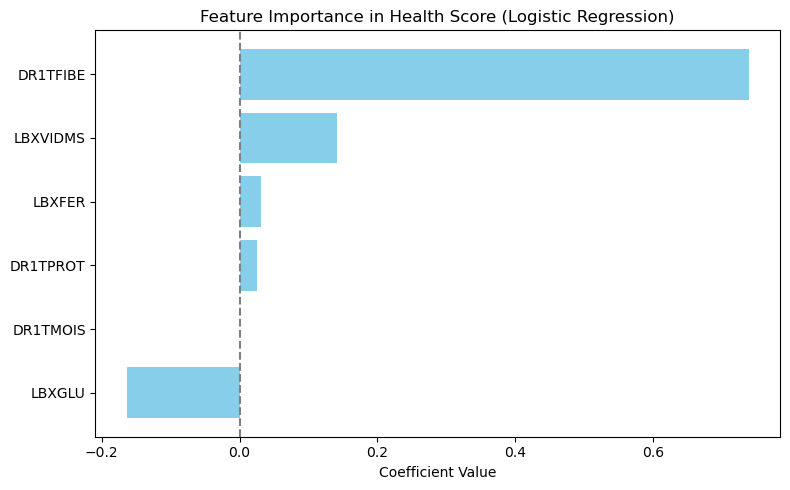

In [59]:
import matplotlib.pyplot as plt

# Sort coefficients for better visualization
coef_df_sorted = coef_df.sort_values(by="Coefficient", ascending=True)

plt.figure(figsize=(8, 5))
plt.barh(coef_df_sorted["Feature"], coef_df_sorted["Coefficient"], color='skyblue')
plt.xlabel("Coefficient Value")
plt.title("Feature Importance in Health Score (Logistic Regression)")
plt.axvline(0, color='gray', linestyle='--')  # 中心线
plt.tight_layout()
plt.show()
